In [13]:
import requests
import json
import sys

import pandas as pd

sys.path.append("../src")

%load_ext autoreload
%autoreload 2

from mubi import metacritic, mubi


### TO DOs
- [x] dataclass and parsing function for mubi API output: extract film names, genres, country  
- [x] Mubi API calling class
- [x] Metacritic dataclass and parsing function for metacritic autosearch call
- [x] Metacritic Autosearch API calling class
- [ ] replace prints by a logger
- [ ] improve config management > set_path?


In [2]:
movie = metacritic.MetaCriticMovie.from_title("Mr. Bachmann and His Class")
print(movie)

In [45]:
collection_test = mubi.MubiCollection(name="Test Retest", id=490)
collection_test.movies = collection.movies[:3]
collection_test.save()

In [55]:
MUBI_FILM_GROUP_URL = "https://api.mubi.com/v3/film_groups?size=40&offset=0"

r = requests.get(MUBI_FILM_GROUP_URL, headers=mubi._HEADERS)

In [92]:
from pathlib import Path
import pandas as pd

path = Path("../data/20221030")

dfs = [pd.read_csv(file) for file in path.glob("*.csv")]
    
df = (pd.concat(dfs)
    .drop_duplicates(subset=["title", "year"])
    .sort_values("meta_score", ascending=False)
)

df.to_csv(path / "_mubi.csv")

In [93]:
app = mubi.MubiAllFilmGroups()

In [94]:
app.consolidate_all_films(Path("../data"))

## Call MetaCritic Separately to try to reduce the rate of missing scores

In [ ]:
mubi.score_refresh.recall_metacritic(DATAPATH)

	Metacritic: No results found for title: The Congress Dances
	Metacritic: No results found for title: The Hunt
	Metacritic: No results found for title: Meeting the Man: James Baldwin in Paris
	Metacritic: No results found for title: The General
	Metacritic: No results found for title: The Balcony Movie
	Metacritic: No results found for title: Time to Love
	Metacritic: No results found for title: Blank Narcissus (Passion of the Swamp)
	Metacritic: No results found for title: The Living Dead
	Metacritic: No results found for title: Nest
	Metacritic: No results found for title: ...A Valparaíso
	Metacritic: No results found for title: Mariner of the Mountains
	Metacritic: No results found for title: Time Piece
	Metacritic: No results found for title: Wasp
	Metacritic: No results found for title: Earth Light
	Metacritic: No results found for title: The Box
	Metacritic: No results found for title: A Foreign Body
	Metacritic: No results found for title: Another World
	Metacritic: No results f

## What is the correlation between metacritic score and mubi rating

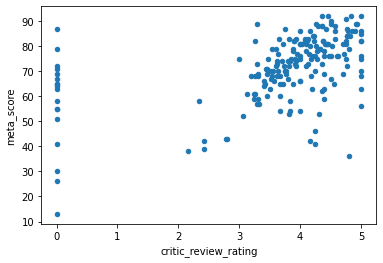

In [7]:
import pandas as pd

filepath = "../data/20221208_mubi.csv"

df = pd.read_csv(filepath)

fig = df.plot.scatter("critic_review_rating", "meta_score")

## Find comedies from after 2015 with rating over 80

In [8]:
df.head(3)

,Unnamed: 0,title,duration,year,web_url,critic_review_rating,director,genres,historic_countries,meta_score
0,0,Mr. Bachmann and His Class,217,2021,https://mubi.com/films/mr-bachmann-and-his-class,4.3636,Maria Speth,['Documentary'],['Germany'],92.0
1,1,One More Time With Feeling,113,2016,https://mubi.com/films/one-more-time-with-feeling,4.4545,Andrew Dominik,"['Music', 'Documentary']","['United Kingdom', 'France']",92.0
2,0,Threads,117,1984,https://mubi.com/films/threads,5.0000,Mick Jackson,"['Drama', 'Sci-Fi', 'War', 'TV Movie']","['United Kingdom', 'Australia']",92.0


In [10]:
recent_good_movies = df.query("year > 2010 & meta_score > 80")
is_recent_good_comedy = recent_good_movies.genres.apply(lambda x: 'Comedy' in x)
recent_good_comedies = recent_good_movies[is_recent_good_comedy]

recent_good_comedies.head(10)

,Unnamed: 0,title,duration,year,web_url,critic_review_rating,director,genres,historic_countries,meta_score
39,11,Întregalde,104,2021,https://mubi.com/films/intregalde,4.3750,Radu Muntean,"['Drama', 'Comedy']",['Romania'],82.0
44,31,The Love Witch,121,2016,https://mubi.com/films/the-love-witch,4.7619,Anna Biller,"['Drama', 'Horror', 'Thriller', 'Comedy', 'Ero...",['United States'],82.0
47,27,Rams,93,2015,https://mubi.com/films/rams,4.0833,Grímur Hákonarson,"['Drama', 'Comedy']","['Iceland', 'Denmark']",82.0
52,35,A Pigeon Sat on a Branch Reflecting on Existence,100,2014,https://mubi.com/films/a-pigeon-sat-on-a-branc...,4.4286,Roy Andersson,"['Comedy', 'Drama']","['Sweden', 'Norway']",81.0


In [12]:
def count_movies_with_metascore(df) -> int:
    return (~df.meta_score.isnull()).sum()

count_movies_with_metascore(df) #, count_movies_with_metascore(df2)

200

In [15]:
df2 = pd.read_csv("../data/20221030_mubi.csv")

merged = pd.concat([df2, df])
merged = merged.sort_values("meta_score", ascending=False)
merged = merged.drop_duplicates(subset=["title", "year"])


for frame in [df, df2, merged]:
    print(count_movies_with_metascore(frame))

200
259
304


In [16]:
merged.head(20)

,Unnamed: 0,title,duration,year,web_url,critic_review_rating,director,genres,historic_countries,meta_score,Unnamed: 0.1
0,0,Wilderness,14,2022,https://mubi.com/films/wilderness-2022,5.000000,Doug Aitken,"['Avant-Garde', 'Short']",['United States'],97.0,NaN
1,1,Iris,80,2014,https://mubi.com/films/iris-2014,4.266700,Albert Maysles,['Documentary'],['United States'],94.0,NaN
2,2,Mr. Bachmann and His Class,217,2021,https://mubi.com/films/mr-bachmann-and-his-class,4.363600,Maria Speth,['Documentary'],['Germany'],92.0,NaN
3,3,Threads,117,1984,https://mubi.com/films/threads,5.000000,Mick Jackson,"['Drama', 'Sci-Fi', 'War', 'TV Movie']","['United Kingdom', 'Australia']",92.0,NaN
1,1,One More Time With Feeling,113,2016,https://mubi.com/films/one-more-time-with-feeling,4.454500,Andrew Dominik,"['Music', 'Documentary']","['United Kingdom', 'France']",92.0,NaN
3,2,35 Shots of Rum,101,2008,https://mubi.com/films/35-shots-of-rum,4.833300,Claire Denis,"['Drama', 'Romance']","['France', 'Germany']",92.0,NaN
4,4,Leviathan,88,2012,https://mubi.com/films/leviathan-2012,4.703700,Verena Paravel,"['Avant-Garde', 'Documentary']","['United Kingdom', 'United States']",92.0,NaN
4,3,Love Affair,87,1939,https://mubi.com/films/love-affair,4.750000,Leo McCarey,"['Comedy', 'Drama', 'Romance']",['United States'],91.0,NaN
8,8,Ugly,112,2013,https://mubi.com/films/ugly,0.000000,Anurag Kashyap,"['Drama', 'Thriller', 'Crime']",['India'],90.0,NaN
9,9,The Commune,112,2016,https://mubi.com/films/the-commune-2015,3.454500,Thomas Vinterberg,['Drama'],"['Denmark', 'Sweden']",90.0,NaN


In [41]:
l = set()
for genres in merged.genres:
    l = l.union(genres[1:-1].split(", "))



In [47]:
merged.query("genres.str.contains('Mystery')")

,Unnamed: 0,title,duration,year,web_url,critic_review_rating,director,genres,historic_countries,meta_score,Unnamed: 0.1
4,4,Burning,149,2018,https://mubi.com/films/burning-2018,4.510200,Lee Chang-dong,"['Drama', 'Mystery']",['South Korea'],90.0,NaN
10,12,Deep Red,127,1975,https://mubi.com/films/deep-red,4.500000,Dario Argento,"['Horror', 'Mystery', 'Thriller']",['Italy'],89.0,NaN
38,31,Charade,113,1963,https://mubi.com/films/charade,3.818200,Stanley Donen,"['Mystery', 'Thriller', 'Crime', 'Romance', 'C...",['United States'],83.0,NaN
42,36,The Headless Woman,90,2008,https://mubi.com/films/the-headless-woman,4.466667,Lucrecia Martel,"['Drama', 'Mystery']","['Argentina', 'France']",81.0,NaN
149,120,We Need to Talk About Kevin,112,2011,https://mubi.com/films/we-need-to-talk-about-k...,3.612900,Lynne Ramsay,"['Drama', 'Mystery', 'Crime']","['United Kingdom', 'United States']",68.0,NaN
153,119,Timecrimes,92,2007,https://mubi.com/films/timecrimes,3.411800,Nacho Vigalondo,"['Horror', 'Mystery', 'Sci-Fi']",['Spain'],68.0,NaN
148,37,The Third Murder,125,2017,https://mubi.com/films/the-third-murder,4.181800,Hirokazu Koreeda,"['Drama', 'Mystery', 'Crime']",['Japan'],68.0,NaN
185,140,Notes on an Appearance,61,2018,https://mubi.com/films/notes-on-an-appearance,4.800000,Ricky D'Ambrose,"['Drama', 'Mystery', 'Thriller']",['United States'],61.0,NaN
248,194,Opera,107,1987,https://mubi.com/films/opera,5.000000,Dario Argento,"['Horror', 'Thriller', 'Mystery']",['Italy'],40.0,NaN
256,200,When a Stranger Calls,97,1979,https://mubi.com/films/when-a-stranger-calls,2.333300,Fred Walton,"['Horror', 'Thriller', 'Mystery', 'Drama']",['United States'],27.0,NaN
